In [1]:
from IPython.core.display import HTML
display(HTML("""
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>"""))

# Finding patterns between emotional state and played songs


## Executive Summary

The study of music and emotions is well-explored in neuroscience, psychology, and physiology. However, experiments in these fields are usually time-consuming, costly, and have poor ability to scale as the technology researchers use, e.g. MRI, PET, EEG, ERP, etc., are usually designed to be conducted in a small-scale setting, focusing on one participant at a time. This can potentially limit the important basic research and preliminary studies that are required before delving into more complicated experiments. Here is where we thought we can apply Frequent Itemset Mining and Association Pattern Mining. More specifically we asked, "can we utilize FIM and APM techniques to identify patterns and rules between emotions and songs, such that researchers in the fields of neuroscience, psychology, and physiology can adapt the project for use in their preliminary studies?" If done right, instead of manually screening for the effect of songs, the researchers can use the mined patterns and rules as guidance for more targeted research.

To build a proof of concept, we used the `#nowplaying-RS` dataset published by Poddar, Zangerle, and Yang in 2018. The dataset contains 11.6 million music listening events (LE) spanning the whole 2014, collected via Twitter. The dataset contains basic listening event information, Tweet information, track musicality (via Spotify API), and sentiment analysis results performed on the hashtags (by the original researchers). In building the pipeline, we first cleaned and preprocessed the sentiment data, choosing to keep data from the `SentiStrength` lexicon. We then joined the sentiment data to the basic listening event data, with the sentiment scores functioning as the emotion state per listening event. Further data cleaning was done on the hashtags and tweet language to ensure proper distribution and to keep English only tweets. The transactional database was then generated from the result of the preceding step.

From the transactional database, we performed FIM and APM techniques, where we were able to recommend actionable insights such as:
- FIM:
    1. Exploring songs that invoke different emotions and how it translates to brain activity
    2. Exploring how songs can potentially synergize positive emotions and identifying how this synergistic mechanism looks like in MRI / PET scans 
    3. Exploring how songs associated with negative emotions affect the brain and different patient demographics
- APM:
    1. Verifying the validity of a rule in an experimental manner. 
    2. For example, whether making patients listen to a song invoking sad emotions (`(ef356d7f3dcb4772dec2e5310ae5c398,) -> 0.375`, lift of `368.783984` would really translate to an invoked negative emotion in terms of brain activity.

Overall, we were successful in finding patterns between emotions and songs. With the methodology and findings of this project, the researchers can then replicate, adapt, or tweak the study using their own databases of emotion states and songs. The flexibility offered by the methodology of the project gives the researchers the ability to have guided insights before performing experiments. These can potentially cut down time, cost, and the required effort in performing preliminary studies. In terms of recommendations, future studies can use a larger dataset with more time periods and more songs for better generalizability. The musical characteristics of each song can also be factored in for more interesting insights and rules.

## 1 Introduction

The effect of music on emotions is a well-explored concept in the fields of neuroscience, psychology, and physiology. Experiments typically consist of listening exercises paired with brain imaging (via MRI or PET scan) to map and match the areas of the brain that activate in response to music. Other technologies that researchers use involve molecular markers and other signal readers such as the use of electroencephalography (EEG), even-related brain potentials (ERP), magnetoencephalography (MEG), skin conductance response (SCR), finger temperature, and goose bump development (piloerection), all of which help researchers identify information on the dynamics and kinetics of emotion (Schaefer, 2017).

However, as advanced as these technologies are, there are obvious downsides, namely: these methods are time-consuming, expensive, and have poor scalability as the researchers can only focus on a handful of participants for a given timeframe. Manually taking measurements for around a hundred people will be costly, not just in terms of money and time but also on effort involved. The cost would even be greater for basic research and preliminary studies where the researchers would have to screen for songs first and their intended target, and then from the initial findings, pinpoint the direction they want to focus on. 

Here is where we thought we can leverage and apply Frequent Itemset Mining and Association Pattern Mining. Given a database of emotion states and songs listened to, researchers can perform FIM and APM in finding patterns and rules between emotion states and played songs. If done right, instead of spending time manually screening for the effect of songs, the researchers can use the mined patterns and rules as guidance for more targeted efforts. They can also focus more on the validation aspect of their studies. 

Given the `#nowplaying-RS` dataset, we than ask: can we utilize FIM and APM techniques to identify patterns and rules between emotions and songs, such that researchers in the fields of neuroscience, psychology, and physiology can replicate / adapt the project for use in their preliminary studies?

### 1.1 Problem Statements

More specifically, this project attemps to answer these questions:
1. Can we find patterns between a user's emotional state and the songs they listen to? 
2. What recommendations can we give based on found patterns?

## 2 Data Description

The dataset used in this study is the `#nowplaying-RS` dataset. The dataset was published by Poddar, Zangerle, and Yang in 2018. 

Overall, the dataset contains 11.6 million music listening events (LE) spanning the whole 2014. The listening events came from 139,000 users and there are around 346,000 unique tracks collected via Twitter. The dataset is separated into three csv files, namely the `user_track_hashtag_timestamp.csv`, the `context_content_features.csv`, and the `sentiment_values.csv`.

The contents of each csv file is as follows:

1. `user_track_hashtag_timestamp.csv` contains the basic information about each listening event, with a shape of `(17_560_113, 4)`. Note that a tweet is implied to be a unique listening event.
    - `user_id`: unique user id of person who tweeted
    - `track_id`: unique track id of song listened to (lifted from Spotify)
    - `hashtag`: hashtag associated with the tweet
    - `created_at`: timestamp of tweet / listening event


2. `context_content_features.csv` contains all context and content features of the listening event. The shape of the dataset is `(11_614_671, 23)`
    - Basic listening event information:
        - `id`: unique event id
        - `user_id`
        - `track_id`
        - `artist_id`
    - Content features of the track (lifted from Spotify):
        - `instrumentalness`
        - `liveness`
        - `speechiness`
        - `danceability`
        - `valence`
        - `loudness`
        - `tempo`
        - `acousticness`
        - `energy`
        - `mode`
        - `key`
    - Context features of the listening event: 
        - `coordinates`: in geoJSON
        - `place`: in geoJSON
        - `geo`
        - `tweet_language`
        - `created_at`
        - `user_lang`
        - `time_zone`
        - `entities`: entities contained in the tweet


3. `sentiment_values.csv` contains all the unique hashtags and the corresponding sentiment values gathered via four different sentiment dictionaries. The minimum (`min`), maximum (`max`), `sum` and average (`avg`) of all sentiments of the tokens of the hashtag are also provided in the dataset. This dataset has a shape of `(5_290, 17)`.
    - Vader (`vader`)
    - AFINN (`afinn`)
    - Opinion Lexicon (`ol`)
    - Sentistrength  Lexicon (`ss`). 


## 3 Methodology

The high level methodology used in this study is as follows:

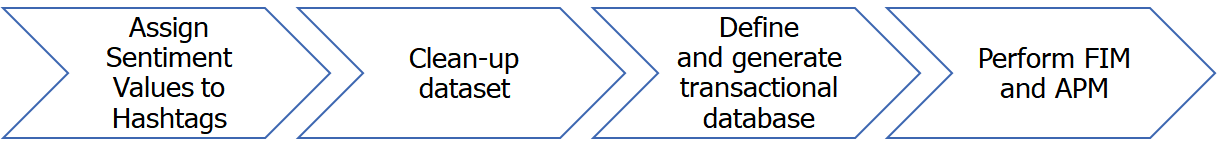

More detailed description:

1. We want to convert the hashtags into emotions by leveraging the sentiment analysis done by Poddar, Zangerle, and Yang (2018) in the original paper.
2. We want to clean-up the dataset and make sure that the remaining hashtags and scores are emotion-based words
3. Defining and generating the transactional database is one of the most crucial steps in doing FIM and APM, for this study we define a transaction to be a unique listening event and the basket of items to be the emotion scores + song played.
4. We then perform FIM and APM to answer the listed problem statements.

## 4 Data Processing

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fim

import requests
from bs4 import BeautifulSoup
import datetime
import time

import base64
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

### 4.1 Data load

In [3]:
root = "/mnt/data/public/nowplaying-rs/nowplaying_rs_dataset/"

df1 = pd.read_csv(root + "sentiment_values.csv")

df2 = pd.read_csv(root + "user_track_hashtag_timestamp.csv")

df3 = pd.read_csv(root + "context_content_features.csv")

### 4.2 Cleaning up the sentiment values of hashtags

In this section, we want to clean up the sentiment values of the hashtags from the `sentiment_values.csv` file for later processing. 

As stated in the methodology above, we will use the hashtags as the proxy identifier for the emotions associated with the songs. According to Poddar, Zangerle, and Yang (2018), these user-provided hashtags are reflective of their self-expression in connection with their activities, thoughts, and emotions as they listen to music. The hashtags are diverse, ranging from the genre or context of the song (e.g. `#metal`) to perceived emotion of the song (e.g. `#fun`). 

The scores associated with each hashtag were determined using an unsupervised sentiment dictionary approach. The dictionaries used by the researchers are well-established dictionaries which have been widely evaluated and are dictionaries that provide both the best coverage and performance in terms of accuracy. These are: AFINN, Opinion Lexicon,
SentiStrength, Vader, and the Sentiment Hashtag Lexicon (Poddar, Zangerie, and Yang, 2018).

The raw data is shown below:

In [4]:
display(df1.head())
display(df1.shape)

,,,,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,ol_max,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg
relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,0.7375,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,0.9000,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,0.8875,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


(5290, 17)

In [5]:
df_sent = (df1.rename(columns = {'hashtag':'ss_score'})
           .reset_index()
           .rename(columns = {'level_0':'hashtag', 
                              'level_1':'vader_score',
                              'level_2':'afinn_score',
                              'level_3':'ol_score'})
           .drop(columns=[' vader_min', ' vader_max', ' vader_sum',
                          '  afinn_min',' afinn_max', ' afinn_sum', ' ol_min',
                          ' ol_max',' ol_sum',' ss_min', ' ss_max',
                          ' ss_sum', ])
          )

The processing steps done above are as follows:
    
1. Renaming of initial `hashtag` to `ss_score` column
2. Removal of multi-index rows to get the scores
3. Renaming of columns to match the proper scores: `vader`, `afinn`, `ol`, in order.
4. Dropping of `min`, `max`, and `sum` scores of the 4 different sentiment-based dictionaries.

The resulting dataset after the cleaning is below:

In [6]:
display(df_sent.head())
display(df_sent.shape)

,hashtag,vader_score,afinn_score,ol_score,ss_score,vader_avg,afinn_avg,ol_avg,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,0.7375,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,0.9000,1.0,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,0.8875,1.0,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,0.0,NaN


(5290, 9)

To have more robust scores for the hashtags, we will use the average score per sentiment dictionary as backup to the calculated score by the researchers, e.g. `vader_avg` is the former and `vader_score` is the latter. All scores are rounded up to the 4th decimal place.

In [7]:
df_sent['vader_fin'] = df_sent.apply(lambda x: round(x['vader_score'],4)
                                     if x['vader_score'] != np.nan 
                                     else round(x['vader_avg'],4), axis=1)

df_sent['afinn_fin'] = df_sent.apply(lambda x: round(x['afinn_score'],4)
                                     if x['afinn_score'] != np.nan 
                                     else round([' afinn_avg'],4), axis=1)

df_sent['ol_fin'] = df_sent.apply(lambda x: round(x['ol_score'],4)
                                     if x['ol_score'] != np.nan 
                                     else round(x[' ol_avg'],4), axis=1)

df_sent['ss_fin'] = df_sent.apply(lambda x: round(x['ss_score'],4)
                                     if x['ss_score'] != np.nan 
                                     else round(x[' ss_avg'],4), axis=1)

In [8]:
display(df_sent[['vader_fin', 'afinn_fin', 'ol_fin', 'ss_fin']].head())
display(df_sent[['vader_fin', 'afinn_fin', 'ol_fin', 'ss_fin']].shape)

,vader_fin,afinn_fin,ol_fin,ss_fin
0,0.8,0.8,2.4,0.8
1,0.8,0.8,0.8,0.8
2,0.8,0.8,2.4,0.8
3,0.7,0.7,0.7,0.7
4,0.3,0.3,0.3,0.3


(5290, 4)

In [9]:
df_sent[['vader_fin', 'afinn_fin', 'ol_fin', 'ss_fin']].isnull().sum()

vader_fin    1423
afinn_fin    1423
ol_fin       1423
ss_fin       1423
dtype: int64

Looking at the count of hashtags with no associated sentiment score, all sentiment lexicons have the same count of missing values.  In choosing which score to keep, we need to dig deeper and look at the distribution of scores per sentiment lexicon, plus the range of the actual scores.

### 4.3 Choosing Sentiment data to keep

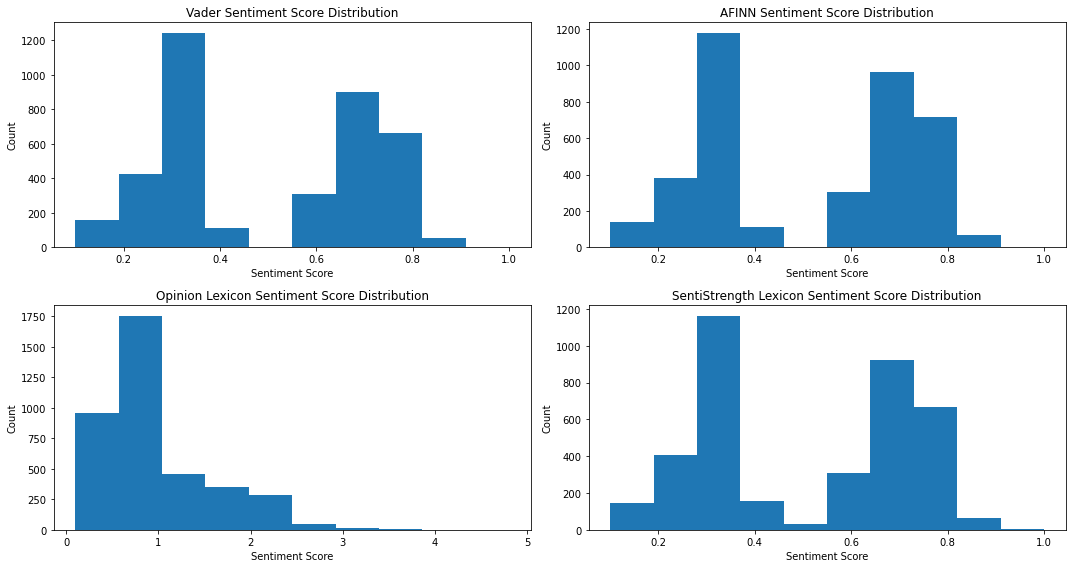

In [10]:
df_vader = (df_sent[['hashtag','vader_fin']].dropna()
            .rename(columns={'vader_fin':'sentiment'}))

df_afinn = (df_sent[['hashtag','afinn_fin']].dropna()
            .rename(columns={'afinn_fin':'sentiment'}))

df_ol = (df_sent[['hashtag','ol_fin']].dropna()
            .rename(columns={'ol_fin':'sentiment'}))

df_ss = (df_sent[['hashtag','ss_fin']].dropna()
            .rename(columns={'ss_fin':'sentiment'}))

fig, axes = plt.subplots(2,2, figsize=(15,8))

for ax, name, data in zip(axes.flat,
                          ['Vader','AFINN', 
                           'Opinion Lexicon', 'SentiStrength Lexicon'],
                          [df_vader,df_afinn, df_ol, df_ss]):
    ax.hist(data['sentiment'])
    ax.set_title(f'{name} Sentiment Score Distribution')
    ax.set_ylabel('Count')
    ax.set_xlabel('Sentiment Score')
    
plt.tight_layout()    
plt.show()

In the graphs above, we can see that Vader, AFINN, and SentiStrength have the same range of scores: from 0 to 1.0 (negative to positive). The general distribution of scores across these 3 sentiment dictionaries are also similar. We can see two  clusters or peaks for Vader, AFINN, and Sentistrength: `0.0 to ~0.4` representing the negative sentiments, and `~0.6 to 1.0`, representing the positive sentiments. 

Meanwhile, for Opinion Lexicon, the range of scores differ, with 0 as the lowest (negative) and 5 as the highest (positive). Sentiment scores for Opinion Lexicon also lean more on the negative end.

In [11]:
display('Vader', df_vader['sentiment'].unique())

display('AFINN', df_afinn['sentiment'].unique())

display('Opinion Lexicon', df_ol['sentiment'].unique())

display('SentiStrength Lexicon', df_ss['sentiment'].unique())

'Vader'

array([0.8, 0.7, 0.3, 0.6, 0.2, 0.9, 0.1, 0.4, 1. ])

'AFINN'

array([0.8, 0.7, 0.3, 0.6, 0.2, 0.9, 0.1, 0.4, 1. ])

'Opinion Lexicon'

array([2.4, 0.8, 0.7, 0.3, 1.2, 0.4, 0.6, 1.8, 0.1, 0.9, 1.6, 0.2, 2.1,
       2.7, 1.5, 2.6, 1.9, 1. , 1.3, 1.4, 1.1, 3. , 3.2, 3.4, 2.2, 2.9,
       1.7, 4.7, 0.5, 2.8, 2. , 3.3, 3.9, 3.6, 3.1, 4.8])

'SentiStrength Lexicon'

array([0.8   , 0.7   , 0.3   , 0.6   , 0.2   , 0.9   , 0.1   , 0.4   ,
       0.675 , 0.25  , 0.8667, 0.475 , 0.5   , 0.65  , 0.55  , 0.35  ,
       0.75  , 0.15  , 0.275 , 0.4333, 0.375 , 0.45  , 0.85  , 0.725 ,
       0.68  , 0.38  , 0.5667, 0.6714, 0.5333, 0.3333, 0.425 , 0.32  ,
       0.225 , 1.    , 0.325 , 0.7333, 0.6667, 0.3667, 0.64  , 0.4286,
       0.66  , 0.775 , 0.2667])

Looking at the unique values per sentiment lexicon, we can see that Vader and AFINN have the same set of values, while Opinion Lexicon and SentiStrength Lexicon have more "finer" / graduated scores.

In selecting the sentiment data to keep, we pick `SentiStrength` based on the more representative distribution of scores and the finer graduation of scores. The more balanced distribution and the finer graduations allow better differentiation of the emotional states. For a particular hashtag, having a score somewhere in between 0.8 and 0.9 is better than being automatically bucketed to either 0.8 or 0.9. Accuracy-wise, the scores given by each sentiment dictionary to a hashtag are not far from each other and in most cases, are the equal to each other (Poddar, Zangerie, and Yang, 2018). Having a more graduated range of scores confers more advantages as we can account for more emotion states and potentially increase interpretability.

### 4.4 Appending `SentiStrength` sentiment data to base listening event dataset

In this section, we are joining the kept sentiment data from the previous section, to the base dataset from `user_track_hashtag_timestamp.csv`. As mentioned in the data description part, this dataset contains the most basic info for each listening event.

The joined dataset is shown below:

In [12]:
df_base = pd.merge(df2, df_ss, on='hashtag')

df_base

,user_id,track_id,hashtag,created_at,sentiment
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21,0.6000
1,132588395,ba84d88c10fb0e42d4754a27ead10546,nowplaying,2014-01-01 05:54:22,0.6000
2,97675221,33f95122281f76e7134f9cbea3be980f,nowplaying,2014-01-01 05:54:24,0.6000
3,17945688,b5c42e81e15cd54b9b0ee34711dedf05,nowplaying,2014-01-01 05:54:24,0.6000
4,452285741,8bd5206b84c968eda0af8bc86d6ab1d1,nowplaying,2014-01-01 05:54:25,0.6000
...,...,...,...,...,...
5956931,1549216658,fbfd4b6ff80084a38f596257089009fc,ripjoecocker,2014-12-22 23:31:40,0.3000
5956932,1197582204,8b64dd68664629ec26788144aa704019,romanticlove,2014-12-23 03:27:41,0.8667
5956933,2214995293,8b64dd68664629ec26788144aa704019,romanticlove,2014-12-23 03:27:55,0.8667
5956934,186008229,c4a0c3feae47b6e6a09141483782302f,confused,2014-12-23 03:49:11,0.3000


From the base dataset which has ~17 M rows, we end up with a much smaller dataset with ~ 6M rows.

In [13]:
df_base.isnull().sum()

user_id       0
track_id      0
hashtag       0
created_at    0
sentiment     0
dtype: int64

There are also no null values in the dataset above, meaning that any hashtag with no associated sentiment score was already removed in the joining process.

### 4.5 Exploring distribution of hashtag values

In this section, we want to explore the distribution of the actual hashtag values in the base dataset. While the distribution of sentiment scores are roughly representative of the emotion spectrum, we still want to check whether the distribution of hashtag values are comparative.

To do this, we will take a look at the top 20 hashtags in terms of count, and their associated sentiment scores.

In [14]:
top_20 = (pd.DataFrame(df_base['hashtag'].value_counts(ascending=False)[:20])
          .reset_index().rename(columns={'hashtag':'count',
                                         'index':'hashtag'}))

top_20_scores = (df_base[df_base['hashtag'].isin(top_20['hashtag'].tolist())]
                 [['hashtag','sentiment']]
                 .drop_duplicates())

pd.merge(top_20, top_20_scores, on='hashtag')

,hashtag,count,sentiment
0,nowplaying,5765350,0.600
1,kiss92,56546,0.800
2,deathrock,24964,0.325
3,urbantraxxradio,23885,0.700
4,doommetal,12222,0.300
5,stonerrock,12220,0.700
6,craveradio,10428,0.300
7,rock,9799,0.700
8,twittamp,3968,0.300
9,realclassicrock,2498,0.700


Looking at the top 20 hashtags in terms of count in the base dataset, we can see that the `nowplaying` hashtag skews the distribution since it is at least 2 orders of magnitude bigger than the next hashtag. `kiss92` only has a count of `56,546` while `nowplaying` has `5,765,350`. It's also interesting to see that some of the hashtags in the top 20 do not really convey emotions, e.g. `kiss92`,`twittamp` etc. Most of these hashtags are either the genre of the song they're listening to, or the platform / radio station. 

Even though the sentiment analysis done by the original researchers was able to assign corresponding scores to these hashtags, it would be better if we remove some of these in the final dataset for the pattern mining so we can focus solely on hashtags that convey emotion. Generally, we only want to remove hashtags that refer to the platforms where they listen to, but not the genre. We acknowledge that keeping the genres might introduce bias but songs belonging to genres have a particular sentiment embedded in them anyway. Removing genre hashtags just might be more detrimental than beneficial since we are removing emotion-conveying hashtags.

The list of hashtags to be excluded are listed below

In [15]:
hashtag_excl = ['nowplaying', 'kiss92', 'urbantraxxradio', 'craveradio',
                'twittamp', 'lametrofm', 'slamhardstyle', 'joy97', 'rocks',
                'googleplay','nowplaying', 'myplaylist','playingnow',
                'playlist','winamp','slamfm','flirtfm','blockfm']

In [16]:
df_base2 = df_base[~df_base['hashtag'].isin(hashtag_excl)]

df_base2

,user_id,track_id,hashtag,created_at,sentiment
5765350,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21,0.3250
5765351,81496937,29cb3f8f366888158226c810b3fee372,deathrock,2014-01-01 06:42:12,0.3250
5765352,81496937,f62b0e51fc59cca8af70942e12554765,deathrock,2014-01-01 06:48:10,0.3250
5765353,81496937,d99853238d61833e3158a0fe76425ca2,deathrock,2014-01-01 07:13:02,0.3250
5765354,81496937,977837bd00f5374b5d0586ba2538523c,deathrock,2014-01-01 07:20:04,0.3250
...,...,...,...,...,...
5956931,1549216658,fbfd4b6ff80084a38f596257089009fc,ripjoecocker,2014-12-22 23:31:40,0.3000
5956932,1197582204,8b64dd68664629ec26788144aa704019,romanticlove,2014-12-23 03:27:41,0.8667
5956933,2214995293,8b64dd68664629ec26788144aa704019,romanticlove,2014-12-23 03:27:55,0.8667
5956934,186008229,c4a0c3feae47b6e6a09141483782302f,confused,2014-12-23 03:49:11,0.3000


Filtering out the listed hashtags left us with a dataset of `88,249` rows. This is a very huge reduction from our base dataset of ~6M. Ideally, we want to have a larger dataset as it offers more generalizability but since the removed hashtags do not necessarily convey emotion, results from the larger dataset might lead to incorrect patterns. 

If we keep `nowplaying`, the mined frequent patterns might center around `0.6` (sentiment score of the hashtag), suggesting that those songs are generally on the positive end, but in reality they might have different scores, the sheer volume of `nowplaying` only masked those results.

In [17]:
df_base2['hashtag'].value_counts(ascending=False)[:20]

deathrock          24964
doommetal          12222
stonerrock         12220
rock                9799
realclassicrock     2498
rockmusic           2459
hardrock            1946
enjoy               1941
goodmemories        1900
goodmusic           1295
like                1098
gossip               608
love                 566
happyholidays        551
silly                532
gamewinner           518
theclash             343
thekills             326
classicrock          287
festival             273
Name: hashtag, dtype: int64

The new top 20 hashtags are shown above, where the hastags are more emotion-conveying words than the previous initial list

### 4.6 Filtering for English only tweets

To have a more focused analysis, we will only be dealing with tweets and hashtags in English. Tweets and hashtags in different languages might have more cultural bias than we can spot so by focusing on English-only tweets, we can potentially minimize this effect. To accomplish this, we'll use the 3rd dataset, `context_content_features.csv`, which has the `tweet_lang` column

In [18]:
df3['tweet_lang'].unique()

array(['en', 'et', 'es', 'sk', 'de', 'id', 'sl', 'pl', 'ja', 'pt', 'fr',
       'zh', 'el', 'tl', 'ko', 'vi', 'ru', 'it', 'ht', 'nl', 'sv', 'no',
       'da', 'tr', 'is', 'fi', 'lv', 'fa', 'hu', 'th', 'uk', 'bg', 'lt',
       'ar', 'he', 'in', 'iw', 'hy', 'ur', 'cy', 'ro', 'hr', 'bs', 'sr',
       'und', 'ka'], dtype=object)

In [19]:
df3['tweet_lang'].value_counts()[:10]

en    10407599
es      270180
et      114205
ja       94981
in       80476
de       74717
it       69684
sk       69046
fr       66555
ht       60616
Name: tweet_lang, dtype: int64

The number of tweets that are in English are still an overwhelmingly majority, ~10,407,599 tweets/listening events in English. In the context of this dataset, removing tweets in other languages won't be an issue since there are still a lot of English tweets that will be left.

In [20]:
df_en = (df3[['user_id','track_id','created_at','tweet_lang']]
         .loc[df3['tweet_lang'] == 'en'])

df_en

,user_id,track_id,created_at,tweet_lang
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en
1,2205686924,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en
2,132588395,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,en
3,97675221,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en
4,17945688,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en
...,...,...,...,...
11614666,431143812,da58ba1ca758809bb86aa8e3a36d1ecc,2014-12-23 07:21:02,en
11614667,2819332208,03498f305040835c5f76d7c5660204a2,2014-12-23 07:21:04,en
11614668,154070865,8bacefe018a221d933529dd466e7c1c0,2014-12-23 07:21:07,en
11614669,985591650,0e64c11b9a77e93f343f9c1c0cdbcf54,2014-12-23 07:21:08,en


In [21]:
df_main = pd.merge(df_base2, df_en, on=['user_id','track_id','created_at'])

df_main

,user_id,track_id,hashtag,created_at,sentiment,tweet_lang
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21,0.325,en
1,81496937,29cb3f8f366888158226c810b3fee372,deathrock,2014-01-01 06:42:12,0.325,en
2,81496937,f62b0e51fc59cca8af70942e12554765,deathrock,2014-01-01 06:48:10,0.325,en
3,81496937,d99853238d61833e3158a0fe76425ca2,deathrock,2014-01-01 07:13:02,0.325,en
4,81496937,977837bd00f5374b5d0586ba2538523c,deathrock,2014-01-01 07:20:04,0.325,en
...,...,...,...,...,...,...
81972,16186878,6a313e5a64929522b763ba5d95812329,getshitdone,2014-12-21 07:27:02,0.300,en
81973,144627010,2697225b5c71fe617f05df700c581d87,smellslikeholidays,2014-12-22 12:41:06,0.700,en
81974,478107841,4dd8aad25817ac873fa581d20dcf2c84,fuckyours,2014-12-22 17:54:55,0.200,en
81975,1549216658,fbfd4b6ff80084a38f596257089009fc,ripjoecocker,2014-12-22 23:31:40,0.300,en


After filtering for English only tweets, we are left with a dataset with `81,977` rows.

With this main dataset, we can now proceed with building the transactional database that will be used to mine patterns and rules.

## 5 Frequent Itemset Mining

### 5.1 Defining the transactional database

In creating the transactional database, we need to define two things: (1) what a transaction is and (2) the basket of items. For this dataset, we can define a transaction to be a unique listening event. In the dataset created above, we can identify unique listening events via unique combinations of `user_id` and timestamp (`created_at`).

For the basket of items, since we are interested in identifying patterns and rules between emotion state and songs, we define a basket to be the emotion score plus the song for a given listening event (`sentiment` + `track_id`).

In [22]:
df_main['event_id'] = (df_main['user_id'].astype(str) 
                       + '-' 
                       + df_main['created_at'].astype(str))

df_temp = pd.concat([df_main[['event_id','sentiment']]
                     .rename(columns={'sentiment':'item'}),
                     df_main[['event_id','track_id']]
                     .rename(columns={'track_id':'item'})])

df_trans = df_temp.groupby('event_id')['item'].agg(set)

pd.DataFrame(df_trans)

,item
event_id,
100053478-2014-07-02 16:45:07,"{0.8, 846524c02bf2f42761e419b0d78ce496}"
1001175709-2014-11-13 11:38:39,"{0.8, 5b3bae0d2cc16c4e2d1460c00ccf2389}"
100210995-2014-09-17 16:02:26,"{0.7, f05a35bcf60b33b431f6df0b807f05cf}"
1003521408-2014-10-20 16:15:34,"{0.2, af801dee3deb09a955868ff86a226b32}"
1006840309-2014-01-05 12:02:36,"{0.2, 801349b3f2b66b437b9e6dfb4121895b}"
...,...
99271482-2014-11-14 17:02:59,"{0.3, 5b19e8f1f04d80db36ca29231576d1f6}"
99271482-2014-11-14 17:10:37,"{0.3, 3e1900d6c1b90817a926c9533298428e}"
992759750-2014-07-12 15:09:48,"{0.2, 690f6d96d74e425e7776cfa437db740a}"


The cell above combines the songs and emotion scores together in one column, `item`. The resulting dataframe (`df_temp`) is then manipulated to create the transactional database (`df_trans`) by grouping the `event_id` and then aggregating via items via the `set` function.

#### 5.1.1 Addressing the `track_id` issue in the transactional database

One obvious issue in the transaction database above is that the songs are left in their ID-format. We might have a hard time interpreting the patterns and rules if the songs are left as `track_id`s. At the very least, we want the songs to be represented by their titles. There are 9901 unique `track_id`s in the main dataset and in the sections below, we will try to scrape the track titles via the Spotify API.

In [23]:
display(f"Unique track ID count: {df_main['track_id'].nunique()}")

'Unique track ID count: 9901'

### 5.2 Scraping for Track Titles via Spotify API

<div class="alert alert-block alert-warning">
    <b>Note to reader / reviewer:</b> This section will error if ran top to bottom since we did not include the client ID and client secret key in the submission for safety and privacy purposes.
</div>

#### 5.2.1 Spotify Initialization

In [24]:
# Establishing of Credentials for Authorization

with open('spotify_client_id.txt') as f:
    client_id = f.read().strip()

with open('spotify_client_secret.txt') as f:
    client_secret = f.read().strip()

credentials = str(base64.b64encode(
    f'{client_id}:{client_secret}'.encode('utf8')), 'utf8')

# Connecting to Spotify

session = requests.Session()

session.post('https://accounts.spotify.com/api/token',
             data=dict(grant_type='client_credentials'),
             headers=dict(Authorization=f'Basic {credentials}'))

# Client O Auth
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)

# Token Authorization

token = oauth.fetch_token(
    token_url='https://accounts.spotify.com/api/token', 
    client_id=client_id,
    client_secret=client_secret)

#### 5.2.2 Scraping titles of songs in the `nowplaying-RS` dataset

In this section, the track endpoint of the Spotify API will be used in scraping the track titles. A sample run consisting of 10 IDs will also be done first.

In [25]:
track_ids = df_main['track_id'].tolist()

track_ids[:10]

['cd52b3e5b51da29e5893dba82a418a4b',
 '29cb3f8f366888158226c810b3fee372',
 'f62b0e51fc59cca8af70942e12554765',
 'd99853238d61833e3158a0fe76425ca2',
 '977837bd00f5374b5d0586ba2538523c',
 '29cdaf72904d9bbe34c7aba19edbb25c',
 '2424f31a8a671fa679a12fce2524088a',
 '7eb2947fe56ee6f43359e01247928817',
 'fb617d07f4b4ec5398c8444a9643f4d0',
 'de0a51296f6982bb1cba708975c7230c']

In [26]:
track_endpoint = "https://api.spotify.com/v1/tracks"


titles_rs = oauth.get(track_endpoint, 
          params={'ids':track_ids[:10]}).json()

titles_rs

{'tracks': [None]}

The request does not return anything if we use the list of 10 IDs

In [27]:
titles_rs2 = oauth.get(track_endpoint, 
          params={'ids':'de0a51296f6982bb1cba708975c7230c'}).json()

titles_rs2

{'tracks': [None]}

The request still does not return anything even if we use an ID in the last of the list, e.g. `de0a51296f6982bb1cba708975c7230c`

#### 5.2.3 Showing that the issue is not with the scraping method

Here, we try to get Spotify IDs by searching for songs via the Search Endpoint. We will then try to use the scraped track ID of these songs as input to the Track Endpoint.

In [28]:
search_endpoint = "https://api.spotify.com/v1/search"


hamilton = oauth.get(search_endpoint, 
          params=dict(q='album:Hamilton (Original Broadway Cast Recording)', 
                      type='track')).json()

[(hamilton['tracks']['items'][i]['name'], 
  hamilton['tracks']['items'][i]['popularity'],
  hamilton['tracks']['items'][i]['id'])
 for i in range(6)]

[('Satisfied', 76, '3dP0pLbg9OfVwssDjp9aT0'),
 ('Alexander Hamilton', 75, '4TTV7EcfroSLWzXRY6gLv6'),
 ('The Schuyler Sisters', 75, '71X7bPDljJHrmEGYCe7kQ8'),
 ("You'll Be Back", 75, '6OG1S805gIrH5nAQbEOPY3'),
 ('My Shot', 75, '4cxvludVmQxryrnx1m9FqL'),
 ('Helpless', 74, '54Sc7mZQ1RM03STpk4SfaA')]

The results above show the Top 5 songs of the album `Hamilton (Original Broadway Cast Recording)` in terms of popularity scores with their corresponding track IDs. By taking the track ID of `Satisfied`, and using it (`3dP0pLbg9OfVwssDjp9aT0`) as the query parameter in the track endpoint search, we can show that the problem lies with the how the `nowplaying-RS` listed their `track_id`s.

In [29]:
titles_ham = oauth.get(track_endpoint, 
          params={'ids':'3dP0pLbg9OfVwssDjp9aT0'}).json()

titles_ham

(titles_ham['tracks'][0]['name'], titles_ham['tracks'][0]['popularity'], 
 titles_ham['tracks'][0]['id'])

('Satisfied', 76, '3dP0pLbg9OfVwssDjp9aT0')

From the results of the cell above, we have shown that we can scrape the details correctly given that the ID's are correct. Comparing the ID format given by spotify to the ID format given by the `nowplaying-RS` dataset, we can see that they differ in length a lot: `3dP0pLbg9OfVwssDjp9aT0` vs `de0a51296f6982bb1cba708975c7230c`.

In their paper, they were able to scrape the track info from Spotify using their provided IDs so either Spotify changed the format of their IDs some time after the researchers collected their data or the disclosed IDs are not from Spotify. Either way, our hands are tied with this matter. Since it's not an issue of scraping and more of a technical issue with the dataset, keeping the songs in their `track_id` format seems to be the only available course of action.

### 5.3 Itemset Mining Implementation

With the transaction database in place, we can now perform Frequent Itemset Mining. In this section, we opted to use pyFIM in executing the itemset mining to leverage its optimized code.

In [30]:
print(f"Number of items: {df_temp['item'].nunique()}")
print(f"Number of transactions: {df_trans.shape[0]}")

Number of items: 9942
Number of transactions: 66485


In terms of which algorithm to use among Apriori, ECLAT, and FP-Growth, we opted to use FP-Growth to avoid multiple scannings of the database (Apriori) and to avoid the costly process of intersecting the itemsets (ECLAT). Brute force method was not even considered as it is generally the most costly in terms of time and computing power.

In the implementation below, since our number of transactions is relatively small, with ~66k transactions only, we set the support to be at least 0.1% (relative support). The rationale is to be able to capture patterns at the low end which might still be of use to the end-user. Setting a high value for support might just result in patterns uninterpretable patterns. The number minimum items in an itemset was also set to be at least 2 for interpretability purposes. An itemset of 1 simply makes no sense in the context of this project.

In [31]:
res = sorted(fim.fpgrowth(df_trans, target='s', report='a', supp=0.1, zmin=2),
       key=lambda x: (-x[1]))

df_itemset = (pd.DataFrame([(tuple(i[0]), i[1]) for i in res[0:10]],
                           columns=['Item_set','Support']))

df_itemset

,Item_set,Support
0,"(0.3, 0.7)",11775
1,"(0.8, 0.7)",1579
2,"(d53b2de022666067050dae8f6645edc2, 0.7)",344
3,"(8918e32050c9e3bb2010a3a3747e3d24, 0.7)",343
4,"(addc364df8649d91eb69b709cd1829c3, 0.4)",234
5,"(f6b6e07e73e2084b3106e9ffe3d99f55, 0.3)",211
6,"(f397b4a15f85fd11bfabcc0af7658af1, 0.4)",206
7,"(91bd533b8654f2e0a8c243b2ffe7827f, 0.2)",181
8,"(c2169e64140cbfcfa1eabe7d5fb1960e, 0.7)",178
9,"(c6e9d893bc254ed5ce0a36152cc67a66, 0.7)",133


Some observations based on the results above:

1. The top 2 most frequent itemsets are comprised purely of emotion score items: 
    - Itemset `(0.3, 0.7)` with a support count of `11,775`
    - Itemset `(0.8, 0.7)` with a support count of `1,579`
2. Mined frequent itemsets are representative of both negative and positive sentiments:
    - Itemset `(d53b2de022666067050dae8f6645edc2, 0.7)` with a support count of `344`
    - Itemset `(91bd533b8654f2e0a8c243b2ffe7827f, 0.2)` with a support count of `181`
3. Top 5 song and emotion itemsets lean towards the negative end of the sentiment spectrum:
    - Itemset `(d53b2de022666067050dae8f6645edc2, 0.7)` with a support count of `344`
    - Itemset `(8918e32050c9e3bb2010a3a3747e3d24, 0.7)` with a support count of `343`
    - Itemset `(addc364df8649d91eb69b709cd1829c3, 0.4)` with a support count of `234`
    - Itemset `(f6b6e07e73e2084b3106e9ffe3d99f55, 0.3)` with a support count of `211`
    - Itemset `(f397b4a15f85fd11bfabcc0af7658af1, 0.4)` with a support count of `206`
  
From these observations, we can generally say that the performed pattern mining was a success and we can definitely use emotion scores and played songs as item sets. We consider it was a success since we can interpret the found patterns and give actionable recommendations despite the songs being still in ID form. Some more specific inferences and recommendations are:

1. Based observation 1 (high count of itemset `(0.3, 0.7)`), we can say that there are songs that can invoke emotions from both ends of the spectrum and that emotions felt in a unique listening event are not mutually exclusive. Applying these in the context of researchers, they would then know not to discount the possibility of a song invoking activity spikes in different areas of the brains.

2. There are also songs that can synergize positive emotions felt, as evidenced by itemset `(0.8, 0.7)` with a support count of `1,579` (observation 1). Researchers can explore how this synergistic mechanism occurs in the brain and how it looks like in MRI / PET scans.

3. Since the top 5 song and emotion itemsets (observation 3) are leaning to the negative end, it might be of value to the researchers to explore what is their effect to the brain and how it would differ from different patient demographics.


## 6 Association Pattern Mining

With the frequent itemset mining successful, we then try to find association rules. For this section, we are also using the  pyFIM library to leverage the optimized code. 

In the implementation below, we set the support to be at least 0.1% (relative support), which is the same value used in the FIM process. We used the same value for consistency relative to the FIM process. For the confidence, we set it to be at the default of 80% since we want a high conditional probability that the consequent is in the transaction given that the same transaction has the antecedent. 

Unlike in the performed FIM above though, we are setting the minimum number of items in an itemset to be 1 since we want to identify rules on the invoked emotion for a given song or set of songs. Setting it to higher than 1 might translate to missed out itemsets and potential rules.

In [32]:
res = sorted(fim.arules(df_trans, supp=.1, conf=80, report='acl', zmin=1), 
                 key=lambda x: (-x[4],-x[3]))


df_rules = (pd.DataFrame([(tuple(i[1]), i[0], i[2], i[3], i[4]) 
                          for i in res[:15]],
                         columns=['Antecedent','Consequent','Support',
                                  'Confidence','Lift']))

df_rules

,Antecedent,Consequent,Support,Confidence,Lift
0,"(6bfb55790293e0a9c94e39fe7039a902,)",0.500,81,1.000000,485.291971
1,"(ef356d7f3dcb4772dec2e5310ae5c398,)",0.375,71,0.887500,368.783984
2,"(addc364df8649d91eb69b709cd1829c3,)",0.400,234,1.000000,95.114449
3,"(f397b4a15f85fd11bfabcc0af7658af1,)",0.400,206,1.000000,95.114449
4,"(9b9adb5f4e4febc7d11e70bfbaf10fde,)",0.400,67,0.985294,93.715707
5,"(91bd533b8654f2e0a8c243b2ffe7827f,)",0.200,181,1.000000,75.294451
6,"(f6b6e07e73e2084b3106e9ffe3d99f55,)",0.300,211,1.000000,4.431742
7,"(f34250f064d6edb087f43a1ce7a60c1b, 0.7)",0.300,130,1.000000,4.431742
8,"(f34250f064d6edb087f43a1ce7a60c1b,)",0.300,130,1.000000,4.431742
9,"(7fda909cd74e7173fb5b55fca3a25869,)",0.300,119,1.000000,4.431742


From the results above we can see that the rules are in generally in the form of `song -> invoked emotion (score)`. The generated rules also have high confidence results, the lowest being `0.8875` for rule: `(ef356d7f3dcb4772dec2e5310ae5c398,) -> 0.375` The lift values for the rules are also greater than 1, meaning that there are indeed associations between the antecendents and their consequents. With these observations, we can say that the Association Pattern Mining was also successful.

For the recommendations that we can make, we can take at the various rules and their lift values:

1. Looking at the rule with the highest lift: `(6bfb55790293e0a9c94e39fe7039a902,) -> 0.500`, with a lift of `485.291971`, we can recommend to our end-users, the researchers, to verify whether making patients listen to this song invoke a neutral mood / emotion. They can record the mood prior to listening and see what the new emotion will be (if applicable) after listening to the song.

2. Similar to recommendation 1 above, reseachers can also see the effectivity of song `ef356d7f3dcb4772dec2e5310ae5c398` in making people feel sad / negative emotions. They can also look at which parts of the brain change activity when going from a positive / neutral emotion to a negative emotion. This is based on the rule `(ef356d7f3dcb4772dec2e5310ae5c398,) -> 0.375` with a lift of `368.783984`.

3. Interestingly, among the top rules generated above, there are no songs that invoke positive emotion (score of > 5.0). From the frequent itemset mining done, we found that itemset `(d53b2de022666067050dae8f6645edc2, 0.7)` has a support count of 344. The researchers can then test what would happen if they make sad / neutral feeling patients listen to song `d53b2de022666067050dae8f6645edc2` and whether it invokes a positive response or not. 

## 7 Conclusion and Recommendation

In conclusion, we were able to develop a pipeline that utilizes tweets data in identifying patterns and rules between emotions and songs played. More specifically, the pipeline utilized the hastags in the tweet as proxy for the emotions of a particular user / listener, and the songs contained in the tweet as the song associated to a particular hashtag / emotion.

In line with the original goal of utilizing FIM and APM techniques such that researchers in the fields of neuroscience, psychology, and physiology can adapt the project as a tool for guidance, we were successful. From the FIM results, we were able to recommend actions such as: 
1. Exploring songs that invoke different emotions and how it translates to brain activity
2. Exploring how songs can potentially synergize positive emotions and identifying how this synergistic mechanism looks like in MRI / PET scans 
3. Exploring how songs associated with negative emotions affect the brain and different patient demographics

From the APM results, we were also able to recommend some specific actions, unique to the context of this dataset, along the lines of verifying the validity of a rule in an experimental manner. For example, whether making patients listen to a song invoking sad emotions (`(ef356d7f3dcb4772dec2e5310ae5c398,) -> 0.375`, lift of `368.783984` would really translate to an invoked negative emotion in terms of brain activity.

With the methodology and findings of this project, the researchers can then replicate or adapt the study using their own databases of emotion states and songs listened per patient. They can also tweak the methodology a little bit to fit their individual experiments / studies. From there, they can proceed to find actionable insights similar to how we developed and framed the recommendations using the `nowplaying-RS` dataset. This flexibility offers the researchers the ability to have guided insights before performing experiments, which can then cut down time, cost, and the required effort in performing preliminary studies.

To further improve on the study, we recommend the usage of larger dataset with more time periods and more songs for better generalizability. The sequential context (e.g. time-series) of the listening events can also be factored in as we assumed in the study that the listening events have no sequential context. Furthermore, the musical characteristics of each song can also be factored in, there might be interesting insights and rules there that might not be captured just by using the track_id. Last but definitely the most important, consider using a database where the track titles are also available as it will greatly improve the interpretation of the mined patterns and rules.

## 8 References

Poddar, A., Zangerie, E., & Yang, Y. (2018). #nowplaying-RS: A New Benchmark Dataset for Building Context-Aware Music Recommender Systems. *Proceedings of the 15th Sound & Music Computing Conference.* Retrieved from http://mac.citi.sinica.edu.tw/~yang/pub/poddar18smc.pdf <br>

Schaefer, H. (2017). Music-Evoked Emotions—Current Studies. *Froniters in Neuroscience*. doi:10.3389/fnins.2017.00600

